In [14]:
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
markers = ['o', 's', 'D', 'v', 'p', 'P', 'X', 'h', 'H', 'd']
colors_discrete = sns.color_palette('tab10')
colors_continuous = sns.color_palette('viridis')


# Do not hide any columns
pd.set_option('display.max_columns', None)

results_path = 'results_localtesting/results'

# Read all the results from results/ directory
results = []
for file in os.listdir(results_path):
    if file.endswith('.feather'):
        results.append(pd.read_feather(f'{results_path}/{file}'))

# Concatenate all the results
df: pd.DataFrame = pd.concat(results, ignore_index=True)

df.head(10)

,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta
0,Bootstrap-Architecture,wine_quality,32,1,Bootstrap-Architecture,0.95,0.5,Model2_4,"[0.23140495867768585, 0.49999999999999994, 0.0...",0,0.506737,1,0.366412,0,"[0.22874136903663247, 0.4989049811762677, 0.04...",0.496772,0,0.365913,0,1,0.012407,0.004590,0.115168,0.333333,1,0.002812,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bootstrap-Architecture,wine_quality,32,1,Bootstrap-Architecture,0.95,0.5,Model2_4,"[0.23140495867768585, 0.49999999999999994, 0.0...",0,0.506737,1,0.366412,0,"[0.22874136903663247, 0.4989049811762677, 0.04...",0.496772,0,0.365913,0,1,0.012407,0.004590,0.115168,0.333333,1,0.002812,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bootstrap-Architecture,wine_quality,32,1,Bootstrap-Architecture,0.95,0.5,Model2_4,"[0.23140495867768585, 0.49999999999999994, 0.0...",0,0.506737,1,0.366412,0,"[0.22874136903663247, 0.4989049811762677, 0.04...",0.496772,0,0.365913,0,1,0.012407,0.004590,0.115168,0.333333,1,0.002812,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bootstrap-Architecture,wine_quality,32,1,Bootstrap-Architecture,0.95,0.5,Model2_4,"[0.23140495867768585, 0.49999999999999994, 0.0...",0,0.506737,1,0.366412,0,"[0.22874136903663247, 0.4989049811762677, 0.04...",0.496772,0,0.365913,0,1,0.012407,0.004590,0.115168,0.333333,1,0.002812,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bootstrap-Architecture,wine_quality,32,1,Bootstrap-Architecture,0.95,0.5,Model2_0,"[0.3223140495867768, 0.44, 0.04819277108433735...",1,0.462308,0,0.364918,0,"[0.3224508523217007, 0.43667120425268763, 0.04...",0.509175,1,0.386846,0,1,0.035064,0.013331,0.090016,0.333333,0,0.002939,"[0.329689192047284, 0.3968878780126166, 0.0530...",0.987728,1.0,0.991035,1.0,1.0,0.887713,0.454829,0.166509,1.0,1.0,0.870496,0.203709,0.799789,NaN,NaN,NaN,NaN,NaN
5,Bootstrap-Architecture,wine_quality,32,1,Bootstrap-Architecture,0.95,0.5,Model2_1,"[0.3223140495867768, 0.44, 0.04819277108433735...",1,0.462308,0,0.220632,0,"[0.3224508523217007, 0.43667120425268763, 0.04...",0.509175,1,0.232224,0,1,0.035064,0.013331,0.090016,0.333333,0,0.002939,"[0.3298581629136719, 0.39595918119021944, 0.05...",0.988536,1.0,0.887330,1.0,1.0,0.908034,0.465361,0.170478,1.0,1.0,0.890817,0.213331,0.737568,NaN,NaN,NaN,NaN,NaN
6,Bootstrap-Architecture,wine_quality,32,1,Bootstrap-Architecture,0.95,0.5,Model2_2,"[0.3223140495867768, 0.44, 0.04819277108433735...",1,0.462308,0,0.233494,0,"[0.3224508523217007, 0.43667120425268763, 0.04...",0.509175,1,0.240519,0,1,0.035064,0.013331,0.090016,0.333333,0,0.002939,"[0.3372287266424036, 0.3531259905418361, 0.140...",0.987663,1.0,0.938593,1.0,1.0,0.981396,0.441261,0.2

In [15]:
df['start_sample_passes_test'].value_counts()

Series([], Name: start_sample_passes_test, dtype: int64)

In [27]:
base_validity_model2 = df[df['base_counterfactual'] != None]['base_counterfactual_validity_model2']
print('Average base_counterfactual_validity_model2:', base_validity_model2.mean())
print('Notna %:', base_validity_model2.notna().sum() / base_validity_model2.shape[0])

robust_validity_model2 = df[df['robust_counterfactual'] != None]['robust_counterfactual_validity_model2']
print('Average robust_counterfactual_validity_model2:', robust_validity_model2.mean())
print('Notna %:', robust_validity_model2.notna().sum() / robust_validity_model2.shape[0])

Average base_counterfactual_validity_model2: 0.42746666666666666
Notna %: 1.0
Average robust_counterfactual_validity_model2: 1.0
Notna %: 0.8


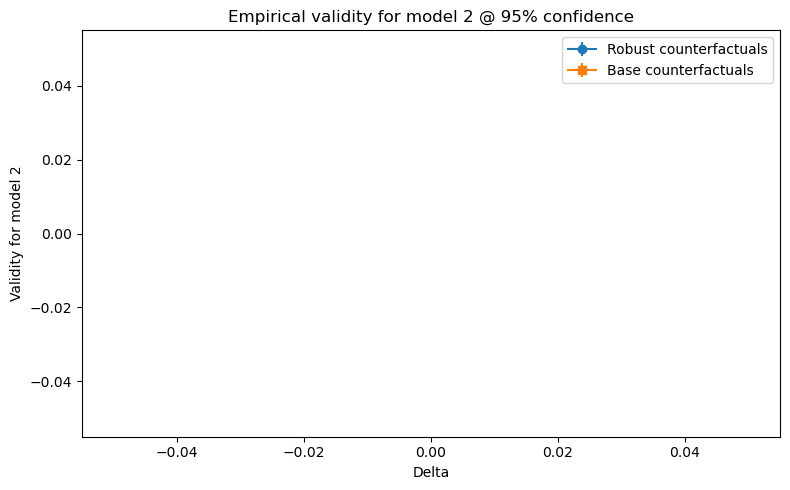

In [28]:
import numpy as np

robust = []
robust_ci = []
base = []
base_ci = []

unique_deltas = sorted(df['delta_robustness'].unique())[:-1]
confidence = 0.95
z = 1.96  # z-score for 95% confidence

for delta in unique_deltas:
    robust_data = df[(df['delta_robustness'] == delta) & (df['beta_confidence'] == confidence) & (df['start_sample_passes_test'] == 0)]['robust_counterfactual_validity_model2'].dropna()
    robust_mean = robust_data.mean()
    robust.append(robust_mean)
    robust_ci.append(z * np.sqrt((robust_mean*(1-robust_mean))/len(robust_data)))

    base_data = df[(df['delta_robustness'] == delta) & (df['beta_confidence'] == confidence)]['base_counterfactual_validity_model2'].dropna()
    base_mean = base_data.mean()
    base.append(base_mean if not pd.isna(base_mean) else base[0])
    base_ci.append(z * np.sqrt((base_mean*(1-base_mean))/len(base_data)) if not pd.isna(base_mean) else 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plt.title(f'Empirical validity for model 2 @ {int(confidence*100)}% confidence')
plt.xlabel('Delta')
plt.ylabel('Validity for model 2')

plt.errorbar(unique_deltas, robust, yerr=robust_ci, label='Robust counterfactuals', marker=markers[0], color=colors_discrete[0])
plt.errorbar(unique_deltas, base, yerr=base_ci, label='Base counterfactuals', marker=markers[1], color=colors_discrete[1])

plt.legend()
plt.tight_layout()

plt.show()